In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv("binaaz_train.csv")
df_test = pd.read_csv("binaaz_test.csv")
df_train.head()



,_id,title,price,price_currency,poster,poster_type,Ünvan,description,Yeniləndi,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,locations,latitude,longitude,seher
0,6,"Satılır 3 otaqlı yeni tikili 135 m², Gənclik m.",300000,AZN,Mubariz,vasitəçi (agent),"Bakı şəhəri, Bakıxanov küçəsi",Təcili Satılır...Qaz Kupça var..\nRoseville...,05 Fevral 2021,5 / 17,135 m²,3,var,yoxdur,\nGənclik m.\nRespublika stadionu \nNərimanov ...,40.400420,49.851554,baki
1,22,"Satılır 3 otaqlı yeni tikili 132.5 m², Nəriman...",153000,AZN,Самир Ахмедов,vasitəçi (agent),"Bakı şəhəri, ул.Табриза 21-23",Срочно.В Наримановском р-не недалеко от 162 шк...,05 Fevral 2021,10 / 16,132.5 m²,3,yoxdur,yoxdur,\nŞərq bazarı \nNərimanov r.\n\n,40.389663,49.853717,baki
2,72,"Satılır 2 otaqlı yeni tikili 115 m², Bayıl q.",171300,AZN,Fikrət,vasitəçi (agent),"Bakı şəhəri, Q.Abbasov küçəsi","Səbail rayonu ,Bayıl qəsəbəsi Q.Abbasov küçəsi...",05 Fevral 2021,7 / 14,115 m²,2,yoxdur,yoxdur,\nSəbail r.\nBayıl q.\n\n,40.347625,49.836685,baki
3,76,"Satılır 2 otaqlı yeni tikili 43 m², Masazır q.",44500,AZN,QASIM,vasitəçi (agent),"Bakı şəhəri, İstiqlaliyyət 14","Masazır qəsəbəsi, Yeni Bakı yaşayış kompleksi ...",05 Fevral 2021,4 / 8,43 m²,2,var,yoxdur,\nAbşeron r.\nMasazır q.\n\n,40.492294,49.747231,baki
4,86,"Satılır 2 otaqlı yeni tikili 65 m², Memar Əcəm...",89900,AZN,Heydər bəy,vasitəçi (agent),"Bakı şəhəri, Mir Cəlal küç.","Tecili satilir !!\n4 cu mikrorayonda, Elmed kl...",05 Fevral 2021,12 / 18,65 m²,2,var,yoxdur,\nMemar Əcəmi m.\nNəsimi r.\n4-cü mikrorayon q...,40.417271,49.810311,baki


In [3]:
df_train["Sahə"] = df_train["Sahə"].apply(lambda x: float(x.split(" ")[0]))
df_test["Sahə"] = df_test["Sahə"].apply(lambda x: float(x.split(" ")[0]))


In [4]:
df_train["exact_mertebe"] = df_train["Mərtəbə"].apply(lambda x: int(x.split(" / ")[0]))
df_test["exact_mertebe"] = df_test["Mərtəbə"].apply(lambda x: int(x.split(" / ")[0]))

In [5]:
df_train["total_mertebe"] = df_train["Mərtəbə"].apply(lambda x: int(x.split(" / ")[1]))
df_test["total_mertebe"] = df_test["Mərtəbə"].apply(lambda x: int(x.split(" / ")[1]))

In [6]:
df_train = df_train[df_train.total_mertebe <=37]
df_train.shape

(69290, 20)

In [7]:
df_train["relative_mertebe"] = df_train["Mərtəbə"].apply(lambda x: int(x.split(" / ")[0]) / int(x.split(" / ")[1]))
df_test["relative_mertebe"] = df_test["Mərtəbə"].apply(lambda x: int(x.split(" / ")[0]) / int(x.split(" / ")[1]))

In [8]:
df_train['Kupça'] = df_train['Kupça'].map({'var': 1, 'yoxdur': 0})
df_train['İpoteka'] = df_train['İpoteka'].map({'var': 1, 'yoxdur': 0})
df_test['Kupça'] = df_test['Kupça'].map({'var': 1, 'yoxdur': 0})
df_test['İpoteka'] = df_test['İpoteka'].map({'var': 1, 'yoxdur': 0})

In [9]:
seherler = pd.get_dummies(df_train["seher"])
df_train = df_train.drop('seher',axis = 1)
df_train = df_train.join(seherler)


In [10]:
seherler_test = pd.get_dummies(df_test["seher"])
df_test = df_test.drop('seher',axis = 1)
df_test = df_test.join(seherler_test)

In [11]:
df_train["merkeze_yaxinliq"] = np.sqrt((df_train['latitude']-40.3663)**2+(df_train['longitude']-49.8350)**2)
df_test["merkeze_yaxinliq"] = np.sqrt((df_test['latitude']-40.3663)**2+(df_test['longitude']-49.8350)**2)

In [12]:
df_train["aliyev"] = np.sqrt((df_train['latitude']-39.215321)**2+(df_train['longitude']-45.406712)**2)
df_test["aliyev"] = np.sqrt((df_test['latitude']-39.215321)**2+(df_test['longitude']-45.406712)**2)

In [13]:
df_train["locations"] = df_train["locations"].apply(lambda x: [al.strip() for al in x.split("\n")[1:-2]])
df_test["locations"] = df_test["locations"].apply(lambda x: [al.strip() for al in x.split("\n")[1:-2]])


In [14]:
#remove outliers

column='price'
q_low = df_train[column].quantile(0.01)
q_hi  = df_train[column].quantile(0.985)
df_train = df_train[(df_train[column] < q_hi) & (df_train[column] > q_low)]
df_train.shape

(67521, 25)

In [15]:
df_train = df_train[(df_train["Sahə"]<=3000)]
df_train = df_train[(df_train["Sahə"]>=10)]
df_train.shape

(67469, 25)

In [16]:
df_train = df_train.dropna()
df_test = df_test.fillna('')








In [17]:
temirli = ['təmirli', 'temirli',"remontlu","tamirli","ремонт"]
yaxin = ["yaxin","yaxın"]
heyet = ["heyet","həyət","Həyət","Heyer"]
yeni = ["yeni","Yeni"]
qarajs = ["гараж","qaraj","Qaraj"]

def to_temir(x):
    if any(temirli_x in x for temirli_x in temirli):
        return 1
    else:
        return 0
def to_yaxin(x):
    if any(yaxin_x in x for yaxin_x in yaxin):
        return 1
    else:
        return 0
    
def to_heyet(x):
    if any(heyet_x in x for heyet_x in heyet):
        return 1
    else:
        return 0

def to_yeni(x):
    if "yeni" in x:
        return 1
    else:
        return 0
    
def to_qaraj(x):
    if any(qaraj in x for qaraj in qarajs):
        return 1
    else:
        return 0




df_train["temir"] = df_train["description"].apply(lambda x: to_temir(x))
df_train["heyet"] = df_train["description"].apply(lambda x: to_heyet(x))
df_train["qaraj"] = df_train["description"].apply(lambda x: to_qaraj(x))
df_train["yeni"] = df_train["description"].apply(lambda x: to_yeni(x))







df_test["temir"] = df_test["description"].apply(lambda x: to_temir(x))
df_test["heyet"] = df_test["description"].apply(lambda x: to_heyet(x))
df_test["qaraj"] = df_test["description"].apply(lambda x: to_qaraj(x))
df_test["yeni"] = df_test["description"].apply(lambda x: to_yeni(x))






In [18]:
def to_mertebe(x):
    if x == 1.00:
        return 1
    else:
        return 0
df_train["max_mertebe"] = df_train["relative_mertebe"].apply(lambda x: to_mertebe(x))
df_test["max_mertebe"] = df_test["relative_mertebe"].apply(lambda x: to_mertebe(x))
df_train["min_mertebe"] = df_train["exact_mertebe"].apply(lambda x: to_mertebe(x))
df_test["min_mertebe"] = df_test["exact_mertebe"].apply(lambda x: to_mertebe(x))

metrolar = ["Elmlər Akademiyası","Sahil","İçəri Şəhər","28 May"]
kirayes = ["kirayə","kiraye","Kiraye","Kirayə"]


def is_elmler(x):
    if 'Elmlər Akademiyası m.' in x:
        return 1
    else:
        return 0

def is_28(x):
    if '28 May m.' in x:
        return 1
    else:
        return 0
    
def is_esas_metro(x):
    if any(metro in x for metro in metrolar):
        return 1
    else:
        return 0

def kiraye(x):
    if any(kiraye in x for kiraye in kirayes):
        return 1
    else:
        return 0
    
def baha(x):
    if any(baha in x for baha in ["baha","Baha"]):
        return 1
    else:
        return 0

def merkez(x):
    if any(merkez in x for merkez in ["merkez","mərkəz","Merkez","Mərkəz"]):
        return 1
    else:
        return 0
    
def poster_type(x):
    if x=="mülkiyyətçi":
        return 1
    else:
        return 0
    

    


df_train["elmler"] = df_train.locations.apply(lambda x: is_elmler(x))
df_test["elmler"] = df_test.locations.apply(lambda x: is_elmler(x))
df_train["28_may"] = df_train.locations.apply(lambda x: is_28(x))
df_test["28_may"] = df_test.locations.apply(lambda x: is_28(x))

df_train["esas_metro"] = df_train.title.apply(lambda x: is_esas_metro(x))
df_test["esas_metro"] = df_test.title.apply(lambda x: is_esas_metro(x))

df_train["kiraye"] = df_train.description.apply(lambda x: kiraye(x))
df_test["kiraye"] = df_test.description.apply(lambda x: kiraye(x))

df_train["baha"] = df_train.description.apply(lambda x: baha(x))
df_test["baha"] = df_test.description.apply(lambda x: baha(x))

df_train["mulki"] = df_train.poster_type.apply(lambda x: poster_type(x))
df_test["mulki"] = df_test.poster_type.apply(lambda x: poster_type(x))

df_train["merkez"] = df_train.description.apply(lambda x: merkez(x))
df_test["merkez"] = df_test.description.apply(lambda x: merkez(x))

df_train["sahe_otaq"] = df_train["Sahə"]/df_train["Otaq sayı"]
df_test["sahe_otaq"] = df_test["Sahə"]/df_test["Otaq sayı"]




df_train["merkez"].value_counts()





0    54641
1    12710
Name: merkez, dtype: int64

In [19]:
df_train = df_train[(df_train.sahe_otaq>12) & (df_train.sahe_otaq < 100)]
df_train.shape

(67222, 39)

In [20]:
# baxca bagca bağça baxça
bagcas = ["baxca","baxça","bağça","bagca","bagça","Bağça"]
def bagca(x):
    if any(bagca in x for bagca in bagcas):
        return 1
    else:
        return 0
df_train["bagca"] = df_train.description.apply(lambda x: bagca(x))
df_test["bagca"] = df_test.description.apply(lambda x: bagca(x))
# esyali əşyalı eshyali Əşyalı
eshyas = ["esyali",'eshyali','əşyalı',"Əşyalı","Esyali","Eshyali"]
def eshya(x):
    if any(eshya in x for eshya in eshyas):
        return 1
    else:
        return 0
df_train["eshya"] = df_train.description.apply(lambda x: eshya(x))
df_test["eshya"] = df_test.description.apply(lambda x: eshya(x))
# kombi Kombi
# muasir müasir Müasir
muasirs = ['müasir', 'Müasir',"muasir","Muasir","modern","Modern"]

def muasir(x):
    if any(muasir in x for muasir in muasirs):
        return 1
    else:
        return 0
df_train["muasir"] = df_train.description.apply(lambda x: muasir(x))
df_test["muasir"] = df_test.description.apply(lambda x: muasir(x))

# mermer mərmər Mərmər
# radnoy Radnoy
# təmirsiz temirsiz Temirsiz Təmirsiz
temirsizs = ['təmirsiz', 'temirsiz',"remontsuz","Təmirsiz","Temirsiz","Remontsuz"]

def temirsiz(x):
    if any(temirsiz in x for temirsiz in temirsizs):
        return 1
    else:
        return 0
df_train["temirsiz"] = df_train.description.apply(lambda x: temirsiz(x))
df_test["temirsiz"] = df_test.description.apply(lambda x: temirsiz(x))

#genish

genishs = ['geniş', 'Geniş',"genis","Genis"]

def genish(x):
    if any(genish in x for genish in genishs):
        return 1
    else:
        return 0
df_train["genish"] = df_train.description.apply(lambda x: genish(x))
df_test["genish"] = df_test.description.apply(lambda x: genish(x))

#zeng

#genish

zengs = ['zeng', 'zəng',"Zəng","Zeng"]

def zeng(x):
    if any(zeng in x for zeng in zengs):
        return 1
    else:
        return 0
df_train["zeng"] = df_train.description.apply(lambda x: zeng(x))
df_test["zeng"] = df_test.description.apply(lambda x: zeng(x))




dayanacaqs = ['Dayanacaq', 'dayanacaq']

def dayanacaq(x):
    if any(dayanacaq in x for dayanacaq in dayanacaqs):
        return 1
    else:
        return 0
    
df_train["dayanacaq"] = df_train.description.apply(lambda x: dayanacaq(x))
df_test["dayanacaq"] = df_test.description.apply(lambda x: dayanacaq(x))


In [21]:
df_train = df_train[df_train.latitude<50]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# X = df_train[["dayanacaq","nerimanov","sahe_otaq","genish","total_mertebe","muasir","temirsiz","eshya","merkez","kiraye","baha","elmler","esas_metro","min_mertebe","max_mertebe","yeni","qaraj","temir","Sahə","Otaq sayı","exact_mertebe","relative_mertebe","baki","sumqayit","xirdalan","merkeze_yaxinliq","longitude","latitude"]].values.reshape(-1,28)
y = df_train["price"].values

X = df_train.drop(["locations",'Mərtəbə','_id', 'title', 'price', 'price_currency', 'poster', 'poster_type','Ünvan', 'description', 'Yeniləndi'],axis=1).values

# scaler = StandardScaler()
# scaled_X = scaler.fit_transform(X)
# X = scaled_X
# X_test_sub = df_test[["dayanacaq","nerimanov","sahe_otaq","genish","total_mertebe","muasir","temirsiz","eshya","merkez","kiraye","baha","elmler","esas_metro","min_mertebe","max_mertebe","yeni","qaraj","temir","Sahə","Otaq sayı","exact_mertebe","relative_mertebe","baki","sumqayit","xirdalan","merkeze_yaxinliq","longitude","latitude"]].values.reshape(-1,28)
X_test_sub = df_test.drop(["locations",'Mərtəbə','_id', 'title', 'price_currency', 'poster', 'poster_type','Ünvan', 'description', 'Yeniləndi'],axis=1).values

# scaled_X_sub = scaler.transform(X_test_sub)
# X_test_sub = scaled_X_sub


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [23]:
# from sklearn.decomposition import PCA
# pca = PCA() # Default n_components = min(n_samples, n_features)
# X_train_pc = pca.fit_transform(X_train)[:,:30]
# X_test_pc = pca.fit_transform(X_test)[:,:30]
# X_test_sub_pc = pca.fit_transform(X_test_sub)




In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model_lr = LinearRegression()
model_lr_sub = LinearRegression()

model_lr.fit(X_train,y_train)
model_lr_sub.fit(X,y)


y_pred_lr = model_lr.predict(X_test)
y_pred_lr_sub = model_lr_sub.predict(X_test_sub)

mean_squared_error(y_test,y_pred_lr,squared=False)




53118.50874813609

In [25]:
df_sub=pd.DataFrame()
df_sub['_id']=df_test._id
df_sub['price']=pd.DataFrame(y_pred_lr_sub)
df_sub.to_csv("result1.csv",index=False)


In [26]:
pd.read_csv("result1.csv").sort_values(by="price")

,_id,price
17775,60186,-3.397586e+06
11442,47147,-2.362557e+05
9237,128123,-8.530647e+04
11357,26516,-8.004141e+04
15267,33922,-6.492736e+04
...,...,...
12013,130282,8.562572e+05
2201,45383,9.529393e+05
6815,33673,9.529393e+05
6652,112870,9.943496e+05


In [27]:
mean_squared_error(y_test,y_pred_lr,squared=False)
y_pred_lr

array([299495.89468251, 144877.91481838, 114026.3020345 , ...,
       115036.97667482, 177315.7983886 , 140925.02027372])

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model_xgb = XGBRegressor(colsample_bytree =0.65,learning_rate = 0.06,max_depth=18,min_child_weight= 3,n_estimators=100,subsample=0.75)
model_xgb_sub = XGBRegressor(colsample_bytree =0.65,learning_rate = 0.06,max_depth=18,min_child_weight= 3,n_estimators=100,subsample=0.75)
parameters = {"subsample":[0.55, 0.65, 0.75],
              "colsample_bytree":[0.65, 0.7, 0.75],
              "max_depth":[18],
              "min_child_weight":[1,2,3],
              "learning_rate":[0.055, 0.06, 0.065],
              "n_estimators":[100]}

# xgb_grid = GridSearchCV(model_xgb,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)
# xgb_grid_sub = GridSearchCV(model_xgb_sub,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

model_xgb.fit(X_train, y_train,
              verbose=True)
model_xgb_sub.fit(X, y,verbose=True)

y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_sub = model_xgb_sub.predict(X_test_sub)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'RMSE_xgb: {int(rmse_xgb)}')
y_pred_xgb

RMSE_xgb: 30530


array([295778.94, 113412.85, 114098.36, ...,  89625.23, 166328.14,
       136118.3 ], dtype=float32)

In [29]:
df_sub=pd.DataFrame()
df_sub['_id']=df_test._id
df_sub['price']=pd.DataFrame(y_pred_xgb_sub)
df_sub.to_csv("result1.csv",index=False)


In [30]:
pd.read_csv("result1.csv")

,_id,price
0,20886,68435.230
1,117465,139018.920
2,125220,440062.280
3,77683,139447.230
4,77672,276954.620
...,...,...
19995,145960,126684.490
19996,66440,296277.100
19997,29047,93978.880
19998,81762,336180.560


In [31]:
df_train.columns

Index(['_id', 'title', 'price', 'price_currency', 'poster', 'poster_type',
       'Ünvan', 'description', 'Yeniləndi', 'Mərtəbə', 'Sahə', 'Otaq sayı',
       'Kupça', 'İpoteka', 'locations', 'latitude', 'longitude',
       'exact_mertebe', 'total_mertebe', 'relative_mertebe', 'baki',
       'sumqayit', 'xirdalan', 'merkeze_yaxinliq', 'aliyev', 'temir', 'heyet',
       'qaraj', 'yeni', 'max_mertebe', 'min_mertebe', 'elmler', '28_may',
       'esas_metro', 'kiraye', 'baha', 'mulki', 'merkez', 'sahe_otaq', 'bagca',
       'eshya', 'muasir', 'temirsiz', 'genish', 'zeng', 'dayanacaq'],
      dtype='object')

In [32]:
df_train.price.max()

729980

In [33]:
df_train.price.min()

37400

In [34]:
df_train.shape

(67221, 46)

In [35]:
feature_importance_score = model_xgb.feature_importances_
feature_importance_score

array([0.16670294, 0.5432741 , 0.0179881 , 0.00259971, 0.0127099 ,
       0.01297372, 0.00459249, 0.01097493, 0.00434082, 0.02311977,
       0.01210654, 0.0060408 , 0.0177897 , 0.01105766, 0.01492624,
       0.00227111, 0.00316963, 0.00263896, 0.01478096, 0.00196668,
       0.00815429, 0.01106288, 0.01546678, 0.00353126, 0.01364435,
       0.00347234, 0.00350155, 0.01947709, 0.00228383, 0.00700212,
       0.00484136, 0.01402826, 0.0021625 , 0.00204666, 0.00330002],
      dtype=float32)

In [36]:
features= df_train.drop(["locations",'Mərtəbə','_id', 'title', 'price', 'price_currency', 'poster', 'poster_type','Ünvan', 'description', 'Yeniləndi'],axis=1).columns
features

Index(['Sahə', 'Otaq sayı', 'Kupça', 'İpoteka', 'latitude', 'longitude',
       'exact_mertebe', 'total_mertebe', 'relative_mertebe', 'baki',
       'sumqayit', 'xirdalan', 'merkeze_yaxinliq', 'aliyev', 'temir', 'heyet',
       'qaraj', 'yeni', 'max_mertebe', 'min_mertebe', 'elmler', '28_may',
       'esas_metro', 'kiraye', 'baha', 'mulki', 'merkez', 'sahe_otaq', 'bagca',
       'eshya', 'muasir', 'temirsiz', 'genish', 'zeng', 'dayanacaq'],
      dtype='object')

<BarContainer object of 35 artists>

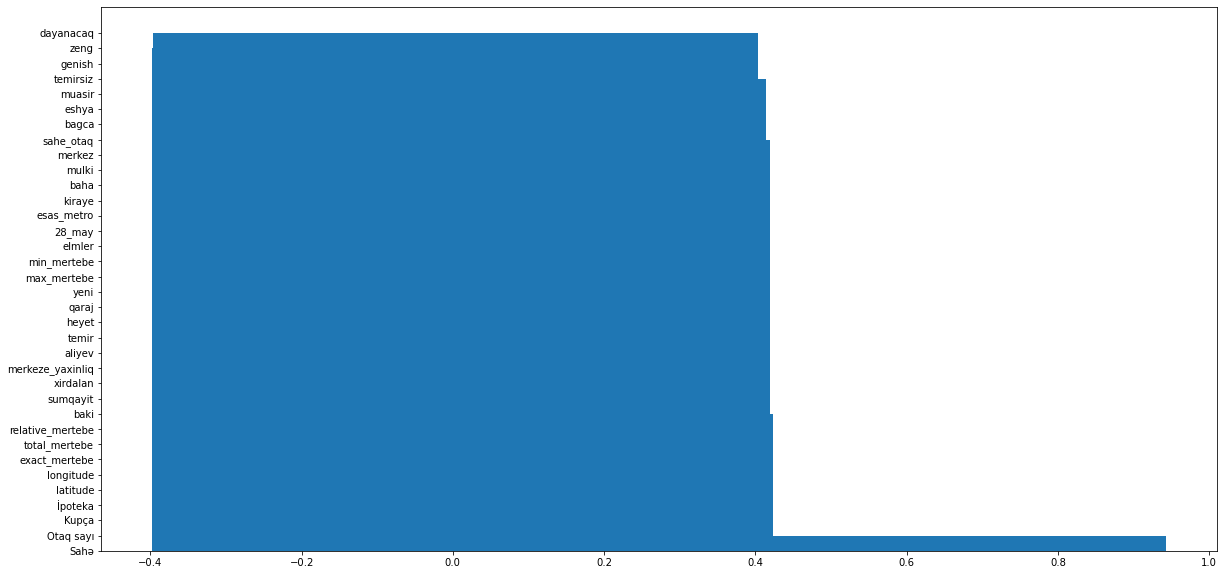

In [37]:
plt.figure(figsize=(20, 10))
plt.bar(feature_importance_score,features)



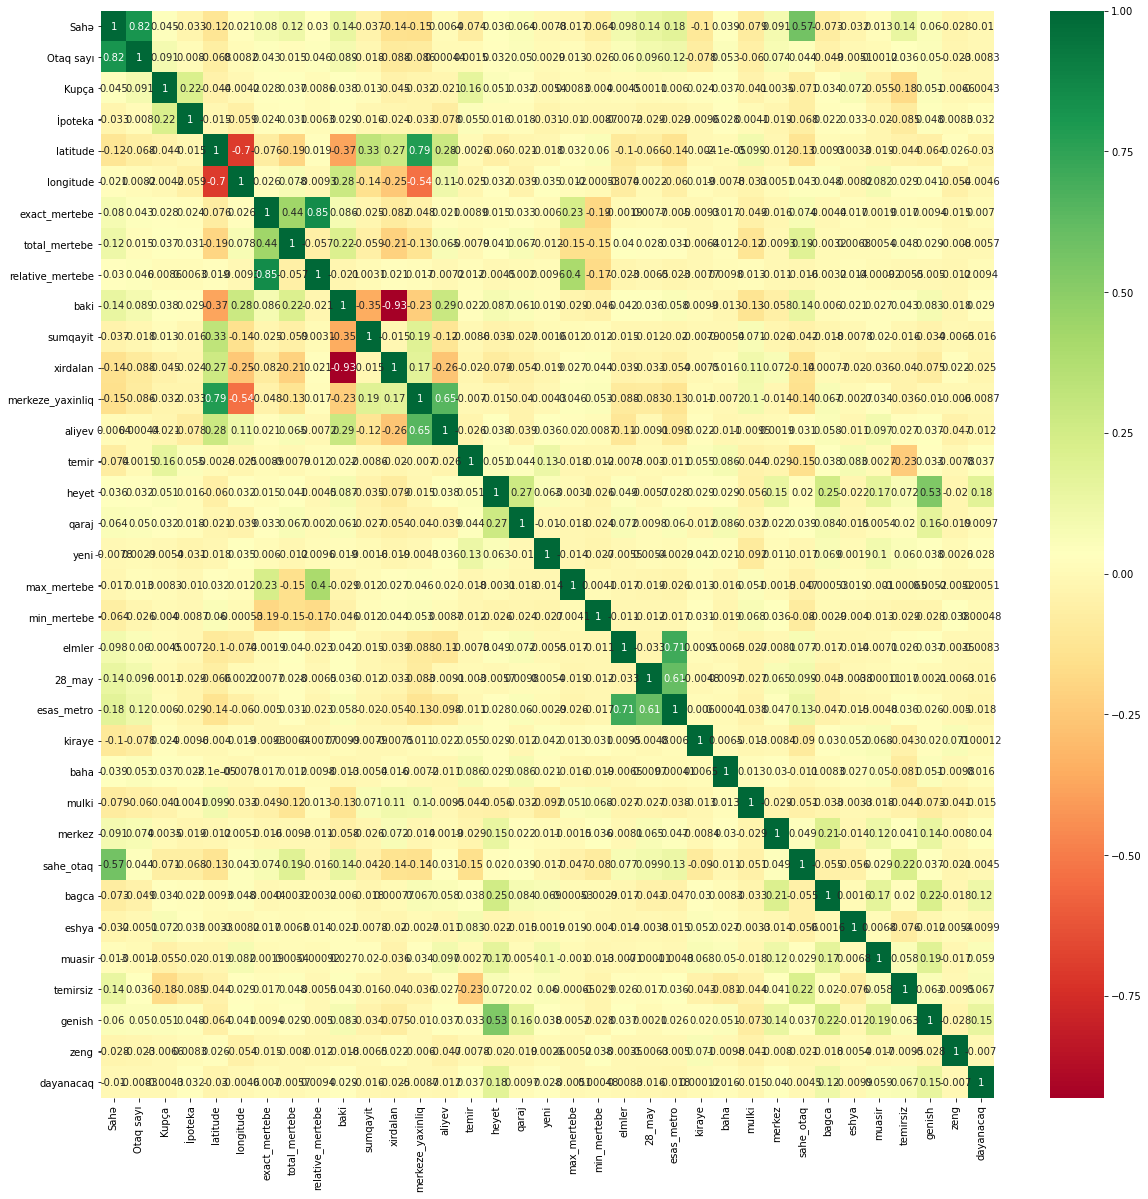

In [38]:
top_corr_features = df_train.corr().index

plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[features].corr(),annot=True,cmap="RdYlGn")

Text(0, 0.5, 'Feature Names')

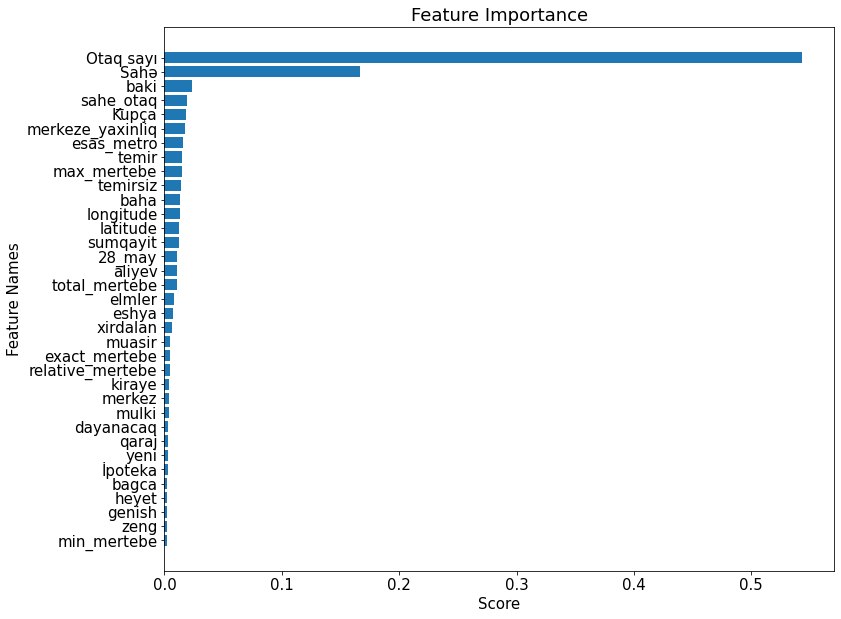

In [63]:


sorted_idx = np.argsort(feature_importance_score)
fig = plt.figure(figsize=(12, 10))
plt.rcParams.update({'font.size': 15})
plt.barh(range(len(sorted_idx)), feature_importance_score[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.title('Feature Importance')
plt.xlabel("Score")
plt.ylabel("Feature Names")


In [40]:
df_train['Otaq sayı'].corr(df_train['price'])


0.6495548619074195

C:\Users\azerm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Qiymət')

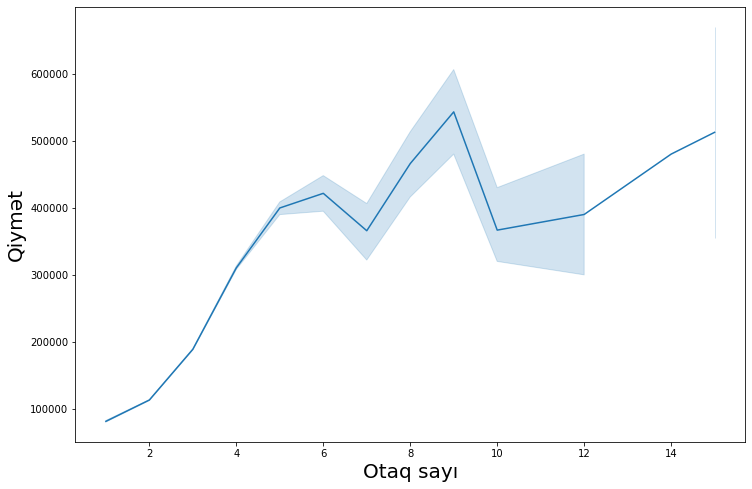

In [41]:
fig = plt.figure(figsize=(12, 8))
b = sns.lineplot(df_train["Otaq sayı"],df_train["price"])
b.set_xlabel("Otaq sayı",fontsize=20)
b.set_ylabel("Qiymət",fontsize=20)

C:\Users\azerm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Qiymət (manat)')

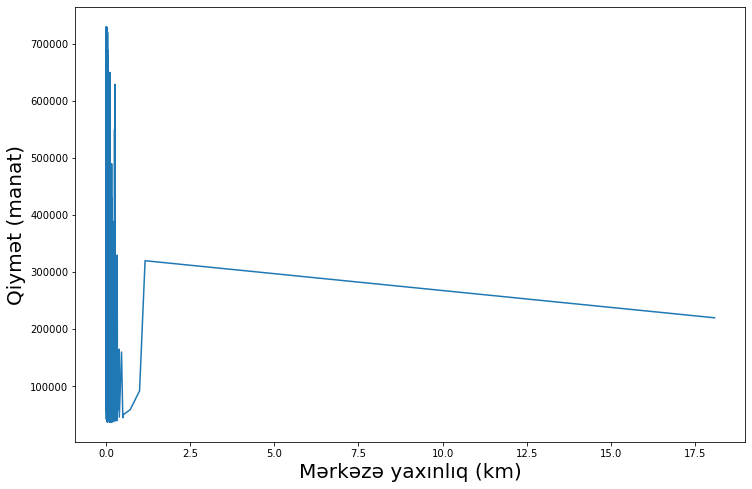

In [42]:
fig = plt.figure(figsize=(12, 8))
b = sns.lineplot(df_train["merkeze_yaxinliq"],df_train["price"])
b.set_xlabel("Mərkəzə yaxınlıq (km)",fontsize=20)
b.set_ylabel("Qiymət (manat)",fontsize=20)

C:\Users\azerm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x576 with 0 Axes>

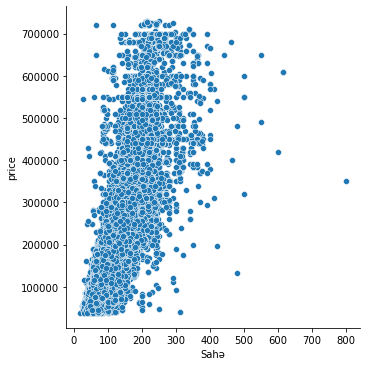

In [43]:
fig = plt.figure(figsize=(12, 8))
b = sns.relplot(df_train["Sahə"],df_train["price"])



C:\Users\azerm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: "None of [Index(['tip'], dtype='object')] are in the [columns]"

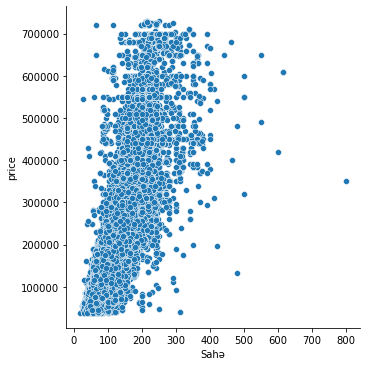

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns 

tips = sns.load_dataset("tips")
g = b =sns.relplot(df_train["Sahə"],df_train["price"])


def specs(x, **kwargs):
    plt.axhline(x.mean(), c='k', ls='-', lw=2.5)

g.map(specs, 'tip')
plt.show()

In [ ]:
p1 = sns.relplot(kind='scatter', x='Sahə', y='price', data=df_train, height=3.5, aspect=1.5)
p1.map_dataframe(sns.lineplot, 'x', 'y_line', color='g')

In [ ]:
df_train.groupby("relative_mertebe").mean()["price"].plot()

In [ ]:
bins = [0, 0.2,0.4,0.6,0.8,1]
df_train['binned'] = pd.cut(df_train['relative_mertebe'], bins)
df_train.groupby("binned").mean()["price"].plot()

In [52]:
df_train[df_train["kiraye"]==1].description[69158]

'Tecili ev satilir  cox elveriwli yerde  ewyalari ile birlikde  yeni temir olunub  erazide  kiraye 600 azn di  hal hazirda  kirayededi  qiymetde razilawmaq olar'

Text(0, 0.5, 'Qiymət (manat)')

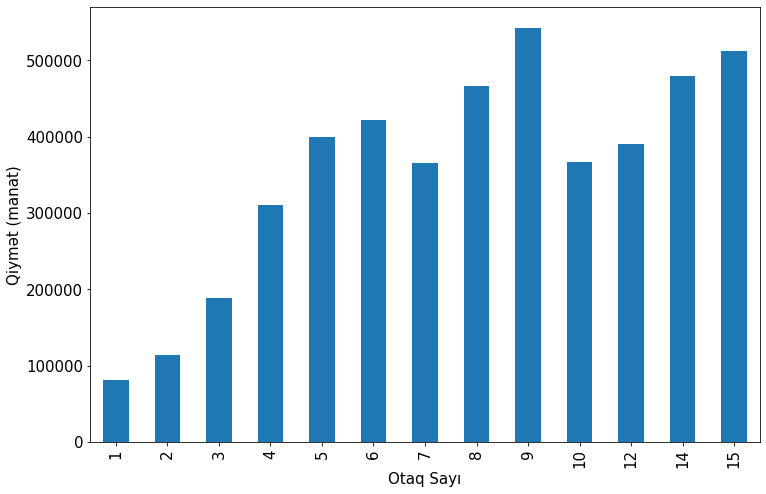

In [64]:
alma = df_train.groupby("Otaq sayı").mean().price
fig = plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})
alma.plot.bar()
plt.xlabel("Otaq Sayı")
plt.ylabel("Qiymət (manat)")